<h1><center>Práctica Aprendizaje Supervisado: Análisis exploratorio de los datos.</center></h1>

# Introducción

Para este estudio vamos a trabajar con el conjunto de datos *kc_house_data*.
Este conjunto de datos recopila información sobre las casas vendidas entre mayo de 2014 y mayo de 2015 en King County, Washington State, USA.

El objetivo es comprender los factores que influyen en el precio de la vivienda y predecir la venta de casas. Para ello, se estudiarán varios modelos:

1. Regresión lineal
2. K-NN
3. Árbol de decisión simple
4. Random Forest
5. GradientBoost
6. XGBoost

y las correspondiente métricas para evaluarlos.

# 0. Librerías

In [1]:
# Paquetes y librerias
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt  

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 1. Análisis exploratorio de los datos

Vamos a comenzar con una exploración previa de los datos por si fuera necesario realizar cambios o transformaciones en los mismos.

En primer lugar, cargamos los datos y miramos la dimensión y la estructura.

In [3]:
# Cargamos los datos
df = pd.read_csv("kc_house_data.csv",parse_dates=['date'])
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# Dimension de los datos
df.shape

(21613, 21)

Tenemos 21613 registros de 21 variables.
Las varibales del dataset son las siguientes:

* _id_ : Identificador de cada casa vendida.
* _date_: Fecha de venta 
* _price_: Precio de la casa. Esta es la **variable target**.
* _bedrooms_: Número de habitaciones de la casa.
* _bathrooms_: Número de baños de la casa.
* _sqft_living_: Superficie habitable (en pies cuadrados)
* _sqft_lot_: Superficie de la parcela (en pies cudradros)
* _floors_: Número de plantas de la casa.
* _waterfront_: Indica si la casa tiene vistas al mar/lago o no (1: Yes; 0: No)
* _view_: Indica el tipo de vista de la casa en una escala del 1 al 4.
* _condition_: Inica la condición de la casa en una escala del 1 al 5.
* _grade_: Puntuación de la casa en una escala del 1 al 13.
* _sqft_above_: Superficie por encima del suelo (en pies cuadrados)
* _sqft_basement_: Superficie del sótanao (en pies cuadrados)
* _yr_built_: Año de construcicción de la casa
* _yr_renovated_: Año de renovación de la casa.
* _zipcode_: Código postal de la casa.
* _lat_: Latitud de la casa.
* _long_: Longitud de la casa.
* _sqft_living15_: Superficie habitable promedio de los 15 vecinos más cercanos.
* _sqft_lot15_: Superficie de la parcela promedio de los 15 vecinos más cercanos.

Vemos el tipo de las variables y si existen valores nulos.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

Comprobamos valores nulos en cada variable y si existen regristros duplicados, que eliminamos en ese caso. 

Además, estudiamos qué variables podemos eliminar del modelo, ya sea porque no aportan información o por no tener calidad suficiente para trabajar con ellas.

In [6]:
# Valores nulos
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
# Valores duplicados
df[df.duplicated()].sum()

id               0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64

In [8]:
df['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

A priori, algunas variables poco interesantes para el estudio son:
* *id*: No es necesario contar con un identificador para las viviendas.
* *yr_renovated*: Se trata de una variable que mide la última renovación de la casa. Sin embargo, es poco informativa al tener 20699 de 21613 valores 0.

In [9]:
# Eliminamos las variables
df = df.drop(columns=['id', 'yr_renovated'],axis = 1)

## Análisis descriptivo

Vemos algunos estadísticos de los datos y estudiamos la distribución de las variables.

In [10]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Algunos aspectos a tener en cuenta:

1. El rango de precios va desde $75000\$$ a $7700000\$$, lo cual supone una gran diferencia.
2. Mientras que la media de baños por vivienda es de 3, existe un valor máximo de 33. Este será estudiado como posible outlier. Lo mismo sucede con los baños.
3. Las variables *waterfront* y *view* acumulan la mayor parte de sus valores en $0$, por lo que pueden no ser signifivativas para el estudio, como sucedía con *yr_renovated*

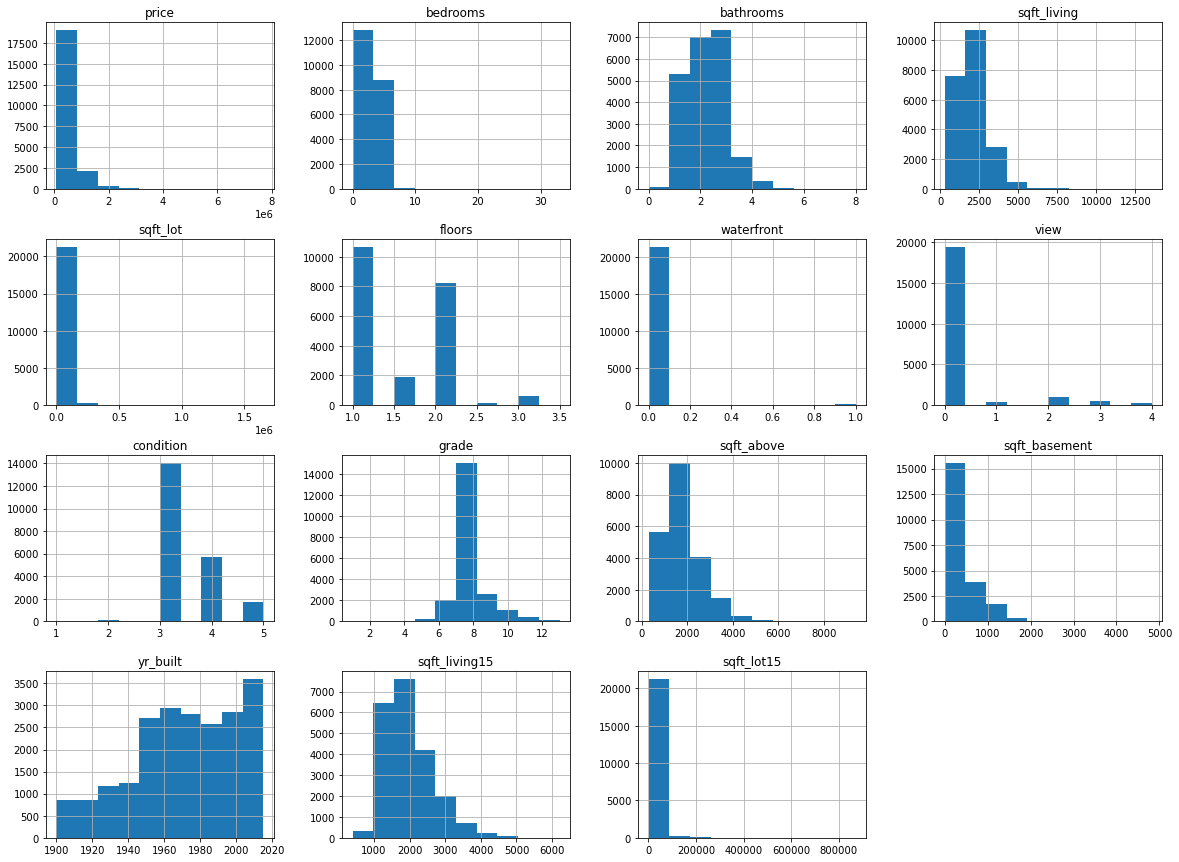

In [11]:
# Histograma de las variables
df.drop(columns=['date','zipcode','lat','long']).hist(figsize=(20,15))
plt.show()

Mediante los histogramas podemos observar que las variables presentan asimetría, lo cual no es favorable para los modelos de regresión. Podemos estudiar esto mediante el coeficiente de asimetria de Fisher, que mida la centralidad de los datos. Si el coeficiente es 0 si los datos están centrados entrorno a la media, si es postivo presentan asimetría por la derecha, y si es negativo asimetría por la izquierda.

In [12]:
# Simetria
df.skew(axis=0)

price             4.024069
bedrooms          1.974300
bathrooms         0.511108
sqft_living       1.471555
sqft_lot         13.060019
floors            0.616177
waterfront       11.385108
view              3.395750
condition         1.032805
grade             0.771103
sqft_above        1.446664
sqft_basement     1.577965
yr_built         -0.469805
zipcode           0.405661
lat              -0.485270
long              0.885053
sqft_living15     1.108181
sqft_lot15        9.506743
dtype: float64

Como podemos observar, variables como *price* o *sqft_lot*, presentan una alta asimetría. Así, realizaremos una transformación logarítmica de los datos tras realizar el estudio de los outliers.

## Outliers

Primero vamos a estudiar los outliers en las variables *bedrooms* y *bathrooms*

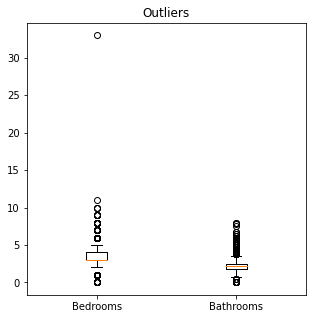

In [13]:
# Boxplot bedrooms y bathrooms
fig = plt.figure(figsize = (5,5))

plt.boxplot(df[['bedrooms','bathrooms']])

plt.title('Outliers')
plt.xticks([1,2], ['Bedrooms', 'Bathrooms'])

plt.show()

Estudiamos los outliers en conjunto. Para ello empleamos la librería *PyOD* que posee estrategias para detectar outliers. En este caso, empleamos el algoritmo de KNN

In [ ]:
#!pip install pyod --user

In [14]:
# Librerias
from pyod.models.knn import KNN

In [15]:
# Deteccion de outliers
A = df[['bedrooms','bathrooms','sqft_living']]
clf = KNN(contamination=0.1)
clf.fit(A)
y_pred = clf.predict(A)
A[y_pred == 1]

,bedrooms,bathrooms,sqft_living
5,4,4.50,5420
6,3,2.25,1715
41,4,2.25,4220
42,5,2.75,3595
49,3,2.50,2753
...,...,...,...
21590,4,3.50,4910
21593,5,3.75,4170
21598,4,2.50,3118
21600,5,3.75,4470


Así, eliminamos los outliers del dataframe original

In [16]:
# Sin outliers
non_outliers = A[y_pred ==0]
df = df.loc[non_outliers.index]

# Dimension del dataframe sin outliers
df.shape

(19832, 19)

Como habíamos comentado antes, las variables como *price*, *sqft_living* y *sqft_lot* presentan mucha asimetría. Por ello, realizamos una transformación logarítmica.

Además, vamos a estudiar si las variables *sqft_living* y *sqft_living15* son parecidas (y lo mismo con *sqft_lot* y *sqft_lot15*), en cuyo caso eliminaremos las dos últimas.

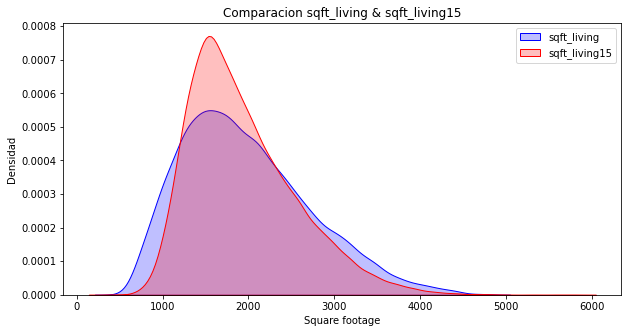

In [17]:
# sqft_living y sqft_living15
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

sns.kdeplot(df['sqft_living'], shade=True, color='blue', label='sqft_living', ax=ax)
sns.kdeplot(df['sqft_living15'], shade=True, color='red', label='sqft_living15', ax=ax)

ax.set_xlabel('Square footage')
ax.set_ylabel('Densidad')
ax.set_title('Comparacion sqft_living & sqft_living15')
ax.legend(loc='best')

plt.show()

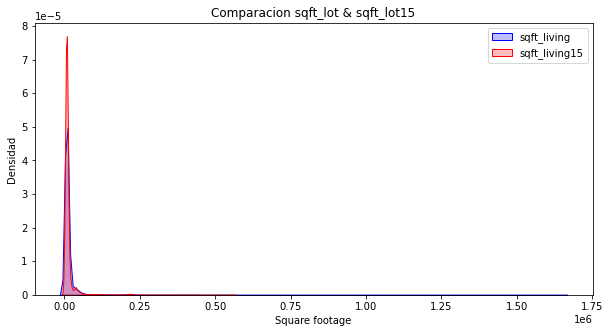

In [18]:
# sqft_lot y sqft_lot15
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

sns.kdeplot(df['sqft_lot'], shade=True, color='blue', label='sqft_living', ax=ax)
sns.kdeplot(df['sqft_lot15'], shade=True, color='red', label='sqft_living15', ax=ax)

ax.set_xlabel('Square footage')
ax.set_ylabel('Densidad')
ax.set_title('Comparacion sqft_lot & sqft_lot15')
ax.legend(loc='best')

plt.show()

Como se distribuyen de la misma manera y nos aportaran la misma infromación, sólo utilizaremos las variables referentes a la casa. 

Procedemos a realizar la transformación logarítmica para obtener simetría.

In [19]:
# Transfomacion
cols = ['price','sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']
for col in cols:
    df[col] = np.log(df[col])

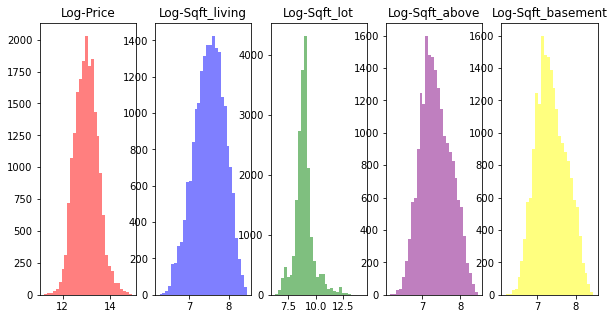

In [20]:
# Histograma de las variables transformadas
fig, axs = plt.subplots(1, 5, figsize=(10, 5))

axs[0].hist(df['price'], bins=30, alpha= 0.5,color='red')
axs[1].hist(df['sqft_living'], bins=30, alpha=0.5, color='blue')
axs[2].hist(df['sqft_lot'], bins=30, alpha=0.5, color='green')
axs[3].hist(df['sqft_above'], bins=30, alpha=0.5, color='purple')
axs[4].hist(df['sqft_above'], bins=30, alpha=0.5, color='yellow')

axs[0].set_title('Log-Price')
axs[1].set_title('Log-Sqft_living')
axs[2].set_title('Log-Sqft_lot')
axs[3].set_title('Log-Sqft_above')
axs[4].set_title('Log-Sqft_basement')

plt.show()

## Algunos gráficos interesantes

Ahora vamos a estudiar algunas relaciones existentes entre las variables y *price*

En primer lugar, podemos ver cómo influye el número de habitaciones y baños en el precio de la casa mediante un boxplot.

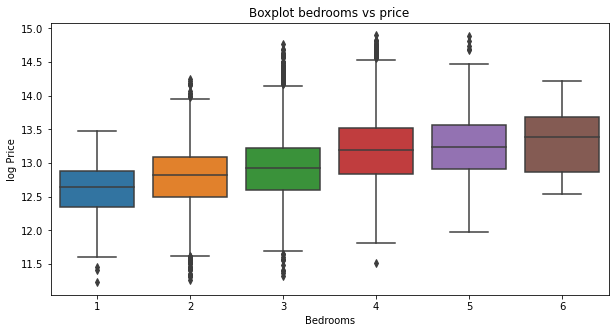

In [21]:
# Boxplot entre bedrooms y log-price
fig, ax = plt.subplots(figsize=(10,5))

sns.boxplot(x=df['bedrooms'], y=df['price'], data = df, ax = ax)

plt.xlabel('Bedrooms')
plt.ylabel('log Price')
plt.title('Boxplot bedrooms vs price')

plt.show()

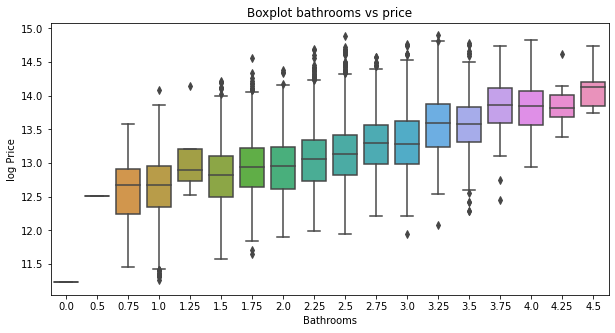

In [22]:
# Boxplot entre bathrooms y logprice
fig, ax = plt.subplots(figsize=(10,5))

sns.boxplot(x=df['bathrooms'], y=df['price'], data = df, ax = ax)

plt.xlabel('Bathrooms')
plt.ylabel('log Price')
plt.title('Boxplot bathrooms vs price')

plt.show()

También podemos ver como aumenta el precio a medida que aumenta la superficie habitable de la casa.

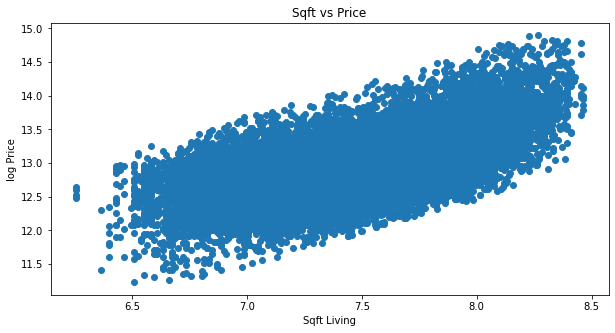

In [23]:
# Grafico de dispersion sqft_living vs. price
fig,ax = plt.subplots(figsize=(10,5))

ax.scatter(x=df['sqft_living'].values, y = df['price'].values)

ax.set_xlabel('Sqft Living')
ax.set_ylabel('log Price')
plt.title('Sqft vs Price')

plt.show()

Además, también puede ser interesante estudiar si existe alguna relación entre las componentes de geolocalización y el precio de las casas.

Podemos comenzar estudiando las variables longitud y latitud de la casa por separado.

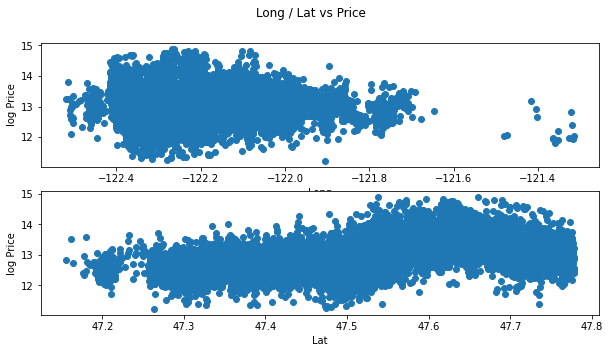

In [24]:
# Grafico de dispersion long /lat vs. price
fig,ax = plt.subplots(2, figsize=(10,5))

ax[0].scatter(x=df['long'].values, y = df['price'].values)
ax[1].scatter(x=df['lat'].values, y = df['price'].values)

ax[0].set_xlabel('Long')
ax[0].set_ylabel('log Price')
ax[1].set_xlabel('Lat')
ax[1].set_ylabel('log Price')

plt.suptitle('Long / Lat vs Price')

plt.show()

También, podemos tratar la latitud y longitud conjutamente creando puntos en el espacio.

In [ ]:
# !pip install geopandas

In [25]:
# Librerias
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [26]:
# Mapa de King County, Washington
street_map = gpd.read_file('Incorporated_Areas_of_King_County___citydst_area.shp')
# Creamos GeoPandas Data Frame
# Sistema de coordenadas 
crs = {'init':'epsg:4326'}
# Puntos de coordenadas
geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
# DataFrame geoPandas
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry = geometry)

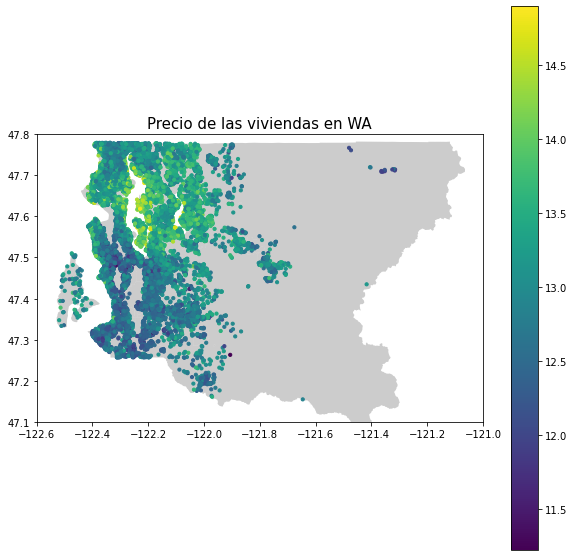

In [27]:
# Grafico de long/lat vs price
fig,ax = plt.subplots(figsize=(10,10))

street_map.plot(ax=ax, alpha=0.4,color='grey') 
geo_df.plot(column='price',ax=ax, alpha=1,legend=True,markersize=10)

plt.title('Precio de las viviendas en WA', fontsize=15)
plt.xlim(-122.6,-121.0)
plt.ylim(47.1,47.8)

plt.show()

Podemos observar que las viviendas situadas al norte tienen un mayor precio.

## Análisis de correlaciones

Para finalizar, estudiamos las correlaciones entre las variables. Así, podemos decidir qué variables usar para el modelo y estudiar posibles relaciones existentes entre ellas.

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.317810,0.494012,0.628805,0.076790,0.295322,0.136386,0.296174,0.045144,0.659268,0.530822,0.257390,0.060971,-0.019257,0.477154,0.038280,0.582823,0.063132
bedrooms,0.317810,1.000000,0.499269,0.641043,0.190531,0.167990,-0.013521,0.054666,0.029463,0.354178,0.519095,0.451064,0.181904,-0.172001,-0.025770,0.158826,0.409206,0.031193
bathrooms,0.494012,0.499269,1.000000,0.743024,0.038343,0.509882,0.029831,0.129412,-0.127127,0.633506,0.663171,0.305145,0.538806,-0.210103,0.014915,0.241424,0.542804,0.054624
sqft_living,0.628805,0.641043,0.743024,1.000000,0.285168,0.353052,0.049561,0.192658,-0.047795,0.707355,0.842125,0.687118,0.354748,-0.219656,0.036147,0.264804,0.722013,0.138389
sqft_lot,0.076790,0.190531,0.038343,0.285168,1.000000,-0.272371,0.065306,0.096179,0.079183,0.125348,0.280126,0.378982,-0.025016,-0.280347,-0.159519,0.370257,0.340055,0.629405
floors,0.295322,0.167990,0.509882,0.353052,-0.272371,1.000000,0.013814,0.002341,-0.265854,0.458227,0.544850,-0.259817,0.494849,-0.056583,0.052453,0.130545,0.265252,-0.031005
waterfront,0.136386,-0.013521,0.029831,0.049561,0.065306,0.013814,1.000000,0.375900,0.015679,0.049332,0.033071,0.047066,-0.033457,0.040352,-0.019610,-0.043182,0.064445,0.032528
view,0.296174,0.054666,0.129412,0.192658,0.096179,0.002341,0.375900,1.000000,0.045338,0.193174,0.102605,0.168750,-0.073800,0.098910,-0.000164,-0.087855,0.241208,0.064334
condition,0.045144,0.029463,-0.127127,-0.047795,0.079183,-0.265854,0.015679,0.045338,1.000000,-0.153245,-0.154376,0.219479,-0.354682,-0.005121,-0.021816,-0.102233,-0.092973,0.003917
grade,0.659268,0.354178,0.633506,0.707355,0.125348,0.458227,0.049332,0.193174,-0.153245,1.000000,0.710393,0.193195,0.457592,-0.177394,0.117279,0.196303,0.683777,0.089246


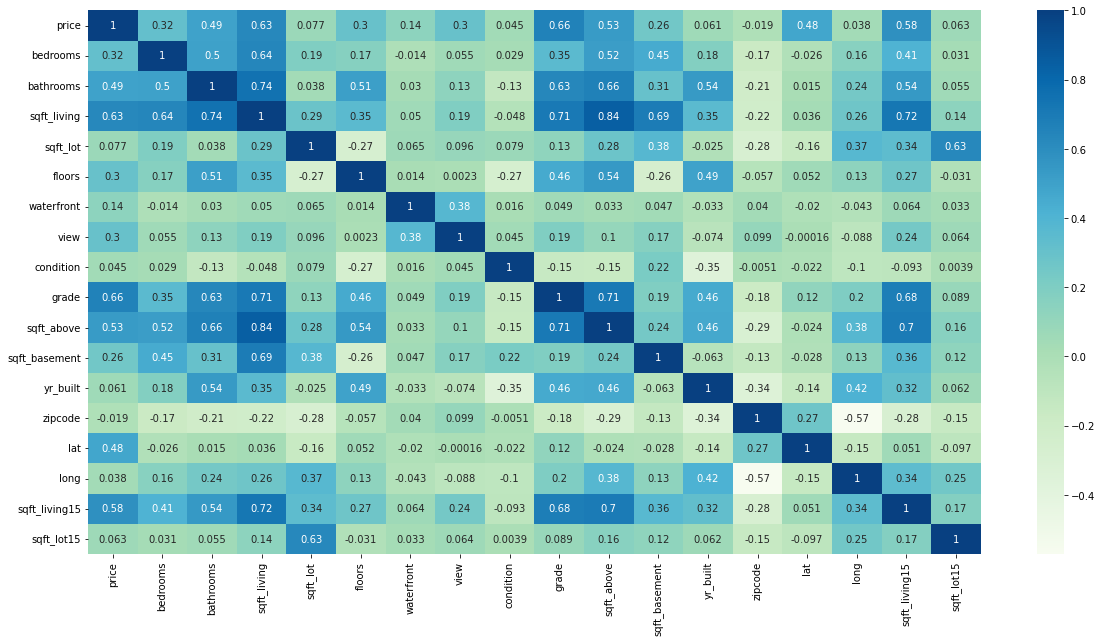

In [28]:
plt.figure(figsize=(20,10))
correlaciones= df.corr()
sns.heatmap(correlaciones,cmap="GnBu",annot=True) 
correlaciones

Así, seleccionamos las siguientes variables para el modelo:
Las variables de modelización:
* _bedrooms_ 
* _bathrooms_ 
* _sqft_living_
* _sqft_lot_
* _view_
* _condition_
* _grade_
* _lat_
* _long_

Además, podemos considerar crear dos variables. Por un lado, *bed&bath*, que incluya en una única variable el número de baños y habitaciones de la casa (pues tienen una alta correlación). Por otro lado, podría ser más interesante trabajar con una variable que definimos como *total_yrs* = *current_year* (2023) - *yr_built*

Y la varibale de etiqueta:
* _logPrice_

Así, nos queda el siguiente DataFrame

In [29]:
# Creamos las nuevas variables
bed_and_bath = df['bedrooms'] + df['bathrooms']
total_yrs = 2023 - df['yr_built']

In [30]:
# DataFrame final 
df = df.drop(columns=['date','bedrooms','bathrooms','floors','waterfront','grade','sqft_above','sqft_basement','yr_built','zipcode','sqft_living15','sqft_lot15','geometry'], axis = 1)
df['bed_and_bath'] = bed_and_bath
df['total_yrs'] = total_yrs
df.head()

,price,sqft_living,sqft_lot,view,condition,lat,long,bed_and_bath,total_yrs
0,12.309982,7.073270,8.639411,0,3,47.5112,-122.257,4.00,68
1,13.195614,7.851661,8.887653,0,3,47.7210,-122.319,5.25,72
2,12.100712,6.646391,9.210340,0,3,47.7379,-122.233,3.00,90
3,13.311329,7.580700,8.517193,0,5,47.5208,-122.393,7.00,58
4,13.142166,7.426549,8.997147,0,3,47.6168,-122.045,5.00,36


# 2. División de los datos

In [31]:
# Paquetes y liberias
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

En primer lugar, creamos la matriz de observaciones y el vector etiqueta con los que trabajaremos para ajustar el modelo de regresión lineal.

In [32]:
# Vector etiqueta
y = df['price']

# Matriz de observaciones
X = df.drop('price',axis=1)

In [33]:
# Variables dummy para view y condition (son categoricas)
X = pd.get_dummies(X, columns=['view', 'condition'], drop_first=True)

In [40]:
# Estandarizamos los datos
# Tomamos solo las variables continuasPara ajustar los distintos modelos tenemos 2 opciopnes:
objeto = StandardScaler()
X_ss = pd.DataFrame(objeto.fit_transform(X.iloc[:,0:6]), columns=list(X.iloc[:,0:6].columns))
# Concatenamos los datos
X = pd.concat([X_ss, X.loc[:,'view_1':'condition_5'].reset_index()], axis=1)
X.head(5)

,sqft_living,sqft_lot,lat,long,bed_and_bath,total_yrs,index,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5
0,-1.130376,-0.366882,-0.358844,-0.299593,-1.042648,0.523123,0,0,0,0,0,0,1,0,0
1,0.873609,-0.081516,1.153561,-0.739949,-0.070600,0.660870,1,0,0,0,0,0,1,0,0
2,-2.229385,0.289429,1.275389,-0.129133,-1.820286,1.280734,2,0,0,0,0,0,1,0,0
3,0.176014,-0.507376,-0.289639,-1.265534,1.290267,0.178753,3,0,0,0,0,0,0,0,1
4,-0.220851,0.044353,0.402405,1.206138,-0.265009,-0.578858,4,0,0,0,0,0,1,0,0


Para ajustar los distintos modelos tenemos 2 opciones:
1. Plantear un problema de regresión donde la variable *y* es de tipo continuo
2. Plantear un problema de clasificación donde agrupamos en diferentes cluster los valores de la variable *y*

In [41]:
# Realizamos un describe para saber como separar los datos
y.describe()

count    19832.000000
mean        13.010204
std          0.487582
min         11.225243
25%         12.666657
50%         12.999065
75%         13.335861
max         14.897316
Name: price, dtype: float64

In [42]:
# Problema de clasificacion
y_clas = pd.qcut(y, 3, labels=False)

# Hallamos los rangos de valores para las diferentes categorias
quantiles = pd.qcut(y, 3).unique().sort_values()
print(quantiles)

[(11.224, 12.78], (12.78, 13.218], (13.218, 14.897]]
Categories (3, interval[float64, right]): [(11.224, 12.78] < (12.78, 13.218] < (13.218, 14.897]]


Donde las clases serían:
$0:\text{Barato} \in (11.224, 12.78]$;
$1:\text{Medio} \in (12.78, 13.218]$;
$2:\text{Caro} \in (13.218, 14.897]$

Separamos los datos en train y test

In [43]:
X_train, X_test, y_train, y_test, y_train_clas, y_test_clas = train_test_split(X, y, y_clas, test_size=0.3, random_state=0)

In [44]:
# Guardamos los datos
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)
y_train_clas.to_csv('y_train_clas.csv', index=False)
y_test_clas.to_csv('y_test_clas.csv', index=False)